# Assignment 2: Web Scraping

### Q1. Scrape Product Information from www.cnet.com  
- Scape content from page https://www.cnet.com/topics/cameras/products/?filter=8a4b1-digital-camera-type_compact_8a4b1-digital-camera-type_dslr (or you can pick any product category from the web site)
- Write a function `scrape_page()` to scrape `name` (see (1) in Figure), `description` (see (2) in Figure), `price` (see (3) in Figure), and `rating` (see (4) in Figure) of 18 products listed on the page. 
  * For star ratings, you can simply scrape the attribute value as shown in the figure 
- (**Bouns**) If you click the image, you can access the review page for each product. Collect the `features` (see (5) in Figure) and the `score` of each features (see (6) in the figure). 
- (**Bonus**) Collect product information from multiple pages. To get to next page, follow the `next` link (see (7) in Figure). **Please do not hardcode the page URL for next page**. To reduce run time, stop scraping after you have collect data from `3 pages`.
- Save the result of scraped content as a `dataframe` and return the dataframe
- Note: if a data element does not exist, leave it as an empty string `''` or make it `None`
 <img src='HW2_image.png' width='80%'>

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

def scrape_page():
    url = 'https://www.cnet.com/topics/cameras/products/?filter=8a4b1-digital-camera-type_compact_8a4b1-digital-camera-type_dslr'
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36'}
    res = requests.get(url,headers=headers)
    bs = BeautifulSoup(res.text, 'html.parser')
    info = bs.find('div', class_='items').find_all('section')
    Name, Desc, Price, Rate = [],[],[],[]

    for product in info:
        global name
        name = product.find('h3')
        if name != None:
            name = name.text.strip()
        Name.append(name)

        global description
        description = product.find('p')
        if description != None:
            description = description.text.strip()
        Desc.append(description)

        global price
        price = product.find('span', class_='price')
        if price != None:
            price = price.text#[1:]
        Price.append(price)

        global rating
        rating = product.find(role='heading')
        if rating != None:
            rating = rating['aria-label']
        Rate.append(rating)

    list_labels = ['names', 'descriptions', 'prices', 'ratings']
    list_cols = [Name, Desc, Price, Rate]
    zipped = list(zip(list_labels, list_cols))
    product_dict = dict(zipped)
    dataframe = pd.DataFrame(product_dict)

    return dataframe

if __name__ == "__main__":
    # Test Q1
    data = scrape_page()
    print(data.head())

                       names  \
0         Canon EOS Rebel T6   
1        Canon EOS Rebel T7i   
2  Canon EOS Rebel Rebel T3i   
3      Panasonic Lumix ZS100   
4         Canon EOS Rebel T3   

                                        descriptions   prices  \
0  The Canon EOS Rebel T6 (aka the EOS 1300D) hit...  $439.00   
1  For a step up in photo quality or performance ...  $799.00   
2  For the money, the Canon EOS Rebel T3i is a gr...  $599.95   
3  The Pansonic ZS100 offers great blend of quali...  $397.99   
4  Though it's a perfectly fine entry-level camer...  $380.00   

              ratings  
0    3 out of 5 stars  
1  3.5 out of 5 stars  
2  3.5 out of 5 stars  
3    4 out of 5 stars  
4  3.5 out of 5 stars  


In [9]:
# Bonus Questions
import requests
from bs4 import BeautifulSoup
import pandas as pd



def scrape_page():
    url = 'https://www.cnet.com/topics/cameras/products/?filter=8a4b1-digital-camera-type_compact_8a4b1-digital-camera-type_dslr'
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36'}
    res = requests.get(url, headers=headers)
    bs = BeautifulSoup(res.text, 'html.parser')
    info = bs.find('div', class_='items').find_all('section')
    Name, Desc, Price, Rate,Design,Feature,Performance, Image_Quality = [], [], [], [],[],[],[],[]

    for product in info:
        global name
        name = product.find('h3')
        if name != None:
            name = name.text.strip()
        Name.append(name)

        global description
        description = product.find('p')
        if description != None:
            description = description.text.strip()
        Desc.append(description)

        global price
        price = product.find('span', class_='price')
        if price != None:
            price = price.text  # [1:]
        Price.append(price)

        global rating
        rating = product.find(role='heading')
        if rating != None:
            rating = rating['aria-label']
        Rate.append(rating)

    list_labels = ['names', 'descriptions', 'prices', 'ratings']
    list_cols = [Name, Desc, Price, Rate]
    zipped = list(zip(list_labels, list_cols))
    product_dict = dict(zipped)
    dataframe = pd.DataFrame(product_dict)

    for camera in dataframe['names']:
        url_review = 'http://cnet.com/reviews/' + camera.replace(' ', '-') + '-review/'
        res_review = requests.get(url_review, headers=headers)
        #print(res_review.status_code)
        if res_review.status_code == 200:
            bs_review = BeautifulSoup(res_review.text, 'html.parser')
            scores = bs_review.find('div', class_='col-6').find_all('li')
            if scores!=[]:
                design=scores[0].find('strong')
                Design.append(design.text if design != None else None)
                feature = scores[1].find('strong')
                Feature.append(feature.text if feature!=None else None)
                performance = scores[2].find('strong')
                Performance.append(performance.text if performance!=None else None)
                image_quality = scores[3].find('strong')
                Image_Quality.append(image_quality.text if image_quality!=None else None)
            else:
                Design.append('')
                Feature.append('')
                Performance.append('')
                Image_Quality.append('')
        else:
            Design.append('')
            Feature.append('')
            Performance.append('')
            Image_Quality.append('')
#     print('design: ',Design, len(Design))
#     print('feature: ',Feature, len(Feature))
#     print('performance: ',Performance, len(Performance))
#     print('image quality: ',Image_Quality, len(Image_Quality))
    dict_review={'design':Design,'feature':Feature,'performance':Performance,'image_quality':Image_Quality}
    #print('\ndictionary:',dict_review)
    df_review=pd.DataFrame(dict_review,columns=['design','feature','performance','image_quality'])
    #print('\n',df_review.head())
    df = pd.concat([dataframe,df_review],axis=1)
    return df


# ---------------------------------------------------------------------------------------------
if __name__ == "__main__":
    # Test Q1
    data = scrape_page()
    print(data)


design:  ['7', '7', '8', '7', '7', '8', '9', '8', '6', '7', '8', '8', '', '9', '', '7', '', '7'] 18
feature:  ['6', '8', '8', '7', '7', '8', '8', '8', '7', '6', '7', '7', '', '8', '', '7', '', '8'] 18
performance:  ['7', '8', '8', '8', '8', '8', '8', '8', '7', '7', '8', '8', '', '7', '', '6', '', '7'] 18
image quality:  ['7', '8', '7', '8', '8', '8', '8', '8', '8', '7', '8', '8', '', '7', '', '8', '', '7'] 18
                        names  \
0          Canon EOS Rebel T6   
1   Canon EOS Rebel Rebel T3i   
2         Canon EOS Rebel T7i   
3                 Nikon D3300   
4         Canon EOS Rebel XSi   
5                 Nikon D5200   
6       Panasonic Lumix LX100   
7        Panasonic Lumix LX10   
8          Canon EOS Rebel T3   
9          Canon EOS Rebel T5   
10        Canon EOS Rebel T5i   
11                Nikon D7200   
12                 Nikon D300   
13       Sony Cyber-shot W290   
14              Canon EOS 77D   
15      Canon PowerShot A2200   
16                 Pentax 

## Q2. Explore data
- Create a function `explore_data` which 
  * takes the dataframe from Q1 as an input
  * converts the price strings to numbers (hint: you can use `try ... except` block for conversion. see some examples at https://stackoverflow.com/questions/379906/how-do-i-parse-a-string-to-a-float-or-int)
  * extracts the start rating numbers 
  * calculates the average price of products by ratings 
  * plots a bar chart for the average price and display the plot. The plot may look similar to the figure below. 

                       names  \
0         Canon EOS Rebel T6   
1  Canon EOS Rebel Rebel T3i   
2        Canon EOS Rebel T7i   
3                Nikon D3300   
4        Canon EOS Rebel XSi   

                                        descriptions   prices  \
0  The Canon EOS Rebel T6 (aka the EOS 1300D) hit...  $439.00   
1  For the money, the Canon EOS Rebel T3i is a gr...  $629.00   
2  For a step up in photo quality or performance ...  $799.00   
3  Very good photo quality for its class plus dec...  $790.00   
4  It doesn't stand out for its feature set or de...  $149.99   

              ratings  
0    3 out of 5 stars  
1  3.5 out of 5 stars  
2  3.5 out of 5 stars  
3  3.5 out of 5 stars  
4  3.5 out of 5 stars  
ratings
3      369.495000
3.5    496.657778
4      770.720000
5      748.000000
Name: prices, dtype: float64


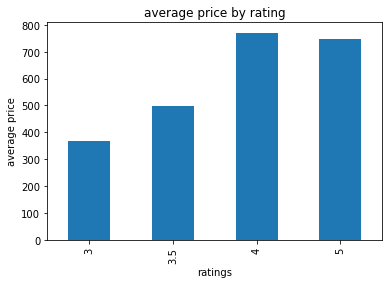

                       names  \
0         Canon EOS Rebel T6   
1  Canon EOS Rebel Rebel T3i   
2        Canon EOS Rebel T7i   
3                Nikon D3300   
4        Canon EOS Rebel XSi   

                                        descriptions  prices ratings  
0  The Canon EOS Rebel T6 (aka the EOS 1300D) hit...  439.00       3  
1  For the money, the Canon EOS Rebel T3i is a gr...  629.00     3.5  
2  For a step up in photo quality or performance ...  799.00     3.5  
3  Very good photo quality for its class plus dec...  790.00     3.5  
4  It doesn't stand out for its feature set or de...  149.99     3.5  


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

def scrape_page():
    url = 'https://www.cnet.com/topics/cameras/products/?filter=8a4b1-digital-camera-type_compact_8a4b1-digital-camera-type_dslr'
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36'}
    res = requests.get(url,headers=headers)
    bs = BeautifulSoup(res.text, 'html.parser')
    info = bs.find('div', class_='items').find_all('section')
    Name, Desc, Price, Rate = [],[],[],[]

    for product in info:
        global name
        name = product.find('h3')
        if name != None:
            name = name.text.strip()
        Name.append(name)

        global description
        description = product.find('p')
        if description != None:
            description = description.text.strip()
        Desc.append(description)

        global price
        price = product.find('span', class_='price')
        if price != None:
            price = price.text#[1:]
        Price.append(price)

        global rating
        rating = product.find(role='heading')
        if rating != None:
            rating = rating['aria-label']
        Rate.append(rating)

    list_labels = ['names', 'descriptions', 'prices', 'ratings']
    list_cols = [Name, Desc, Price, Rate]
    zipped = list(zip(list_labels, list_cols))
    product_dict = dict(zipped)
    dataframe = pd.DataFrame(product_dict)

    return dataframe
# ---------------------------------------------------------------------------------------------

def explore_data(df):
    
    prices = [i.replace(',', '') if i != None else None for i in df['prices']]
    df['prices'] = prices
    prices_new = []
    for i in df['prices']:
        if i != None:
            try:
                i = int(i[1:])
            except:
                i = float(i[1:])
        prices_new.append(i)
    df['prices'] = prices_new
    ratings_new=[star[:-15] if star!=None else None for star in df['ratings'] ]
    df['ratings'] = ratings_new

    print(df.groupby(['ratings'])['prices'].mean())
    df.groupby(['ratings'])['prices'].mean().plot.bar()
    plt.ylabel('average price')
    plt.title('average price by rating')
    plt.show()
    print(df.head())

if __name__ == "__main__":
    # Test Q1
    data = scrape_page()
    print(data.head())

    # Test Q2:
    explore_data(data)

                       names  \
0         Canon EOS Rebel T6   
1  Canon EOS Rebel Rebel T3i   
2        Canon EOS Rebel T7i   
3                Nikon D3300   
4        Canon EOS Rebel XSi   

                                        descriptions   prices  \
0  The Canon EOS Rebel T6 (aka the EOS 1300D) hit...  $439.00   
1  For the money, the Canon EOS Rebel T3i is a gr...  $629.00   
2  For a step up in photo quality or performance ...  $799.00   
3  Very good photo quality for its class plus dec...  $790.00   
4  It doesn't stand out for its feature set or de...  $149.99   

              ratings design feature performance image_quality  
0    3 out of 5 stars      7       6           7             7  
1  3.5 out of 5 stars      7       8           8             8  
2  3.5 out of 5 stars      8       8           8             7  
3  3.5 out of 5 stars      7       7           8             8  
4  3.5 out of 5 stars      7       7           8             8  
ratings
3      369.495000


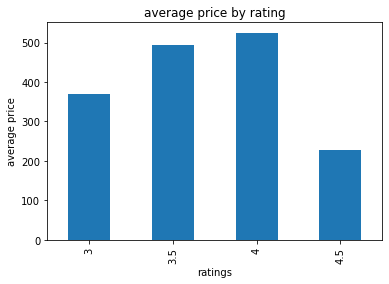

                       names  \
0         Canon EOS Rebel T6   
1  Canon EOS Rebel Rebel T3i   
2        Canon EOS Rebel T7i   
3                Nikon D3300   
4        Canon EOS Rebel XSi   

                                        descriptions  prices ratings design  \
0  The Canon EOS Rebel T6 (aka the EOS 1300D) hit...  439.00       3      7   
1  For the money, the Canon EOS Rebel T3i is a gr...  629.00     3.5      7   
2  For a step up in photo quality or performance ...  799.00     3.5      8   
3  Very good photo quality for its class plus dec...  790.00     3.5      7   
4  It doesn't stand out for its feature set or de...  149.99     3.5      7   

  feature performance image_quality  
0       6           7             7  
1       8           8             8  
2       8           8             7  
3       7           8             8  
4       7           8             8  


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


def scrape_page():
    url = 'https://www.cnet.com/topics/cameras/products/?filter=8a4b1-digital-camera-type_compact_8a4b1-digital-camera-type_dslr'
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36'}
    res = requests.get(url, headers=headers)
    bs = BeautifulSoup(res.text, 'html.parser')
    info = bs.find('div', class_='items').find_all('section')
    Name, Desc, Price, Rate,Design,Feature,Performance, Image_Quality = [], [], [], [],[],[],[],[]

    for product in info:
        global name
        name = product.find('h3')
        if name != None:
            name = name.text.strip()
        Name.append(name)

        global description
        description = product.find('p')
        if description != None:
            description = description.text.strip()
        Desc.append(description)

        global price
        price = product.find('span', class_='price')
        if price != None:
            price = price.text  # [1:]
        Price.append(price)

        global rating
        rating = product.find(role='heading')
        if rating != None:
            rating = rating['aria-label']
        Rate.append(rating)

    list_labels = ['names', 'descriptions', 'prices', 'ratings']
    list_cols = [Name, Desc, Price, Rate]
    zipped = list(zip(list_labels, list_cols))
    product_dict = dict(zipped)
    df_1 = pd.DataFrame(product_dict)


    for camera in df_1['names']:
        url_review = 'http://cnet.com/reviews/' + camera.replace(' ', '-') + '-review/'
        res_review = requests.get(url_review, headers=headers)
        # print(res_review.status_code)
        if res_review.status_code == 200:
            bs_review = BeautifulSoup(res_review.text, 'html.parser')
            scores = bs_review.find('div', class_='col-6').find_all('li')
            if scores != []:
                design = scores[0].find('strong')
                Design.append(design.text if design != None else None)
                feature = scores[1].find('strong')
                Feature.append(feature.text if feature != None else None)
                performance = scores[2].find('strong')
                Performance.append(performance.text if performance != None else None)
                image_quality = scores[3].find('strong')
                Image_Quality.append(image_quality.text if image_quality != None else None)
            else:
                Design.append('')
                Feature.append('')
                Performance.append('')
                Image_Quality.append('')
        else:
            Design.append('')
            Feature.append('')
            Performance.append('')
            Image_Quality.append('')
    #     print('design: ',Design, len(Design))
    #     print('feature: ',Feature, len(Feature))
    #     print('performance: ',Performance, len(Performance))
    #     print('image quality: ',Image_Quality, len(Image_Quality))
    dict_review = {'design': Design, 'feature': Feature, 'performance': Performance, 'image_quality': Image_Quality}
    # print('\ndictionary:',dict_review)
    df_2 = pd.DataFrame(dict_review, columns=['design', 'feature', 'performance', 'image_quality'])
    # print('\n',df_review.head())
    df = pd.concat([df_1, df_2], axis=1)
    return df


#---------------------------------------------------------------------------------------------

def explore_data(df):
    prices = [i.replace(',', '') if i != None else None for i in df['prices']]
    df['prices'] = prices
    prices_new = []
    for i in df['prices']:
        if i != None:
            try:
                i = int(i[1:])
            except:
                i = float(i[1:])
        prices_new.append(i)
    df['prices'] = prices_new
    ratings_new = [star[:-15] if star != None else None for star in df['ratings']]
    df['ratings'] = ratings_new

    print(df.groupby(['ratings'])['prices'].mean())
    df.groupby(['ratings'])['prices'].mean().plot.bar()
    plt.ylabel('average price')
    plt.title('average price by rating')
    plt.show()
    print(df.head())


if __name__ == "__main__":
    # Test Q1
    data = scrape_page()
    print(data.head())

    # Test Q2:
    explore_data(data)

### Reminder ###

Similar to HW_1, please convert your solution to `.py` file and properly test your `.py` before submission. Good luck!

In [126]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# add the headers to request.get
headers = { 'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.'
                              '86 Safari/537.36'}
# host_name
host_name = "https://www.cnet.com"

initial_url = "https://www.cnet.com/topics/cameras/products/?filter=8a4b1-digital-camera-type_compact_8a4b1-digital-camera-type_dslr"


def scrape_page():
    
    data=[]  # variable to hold all reviews
    
    # add your code here    
    
    return data

def explore_data(df):
    
    # add your code
    
    # when you have plot, show the plot
    # plt.show()
    

In [127]:
if __name__ == "__main__":
    
    # Test Q1
    data = scrape_page()
    data.head()
    
    # Test Q2:
    explore_data(data)
    
    # Solution with bonus
    data = scrape_page(pages = 3, get_review=True)
    data.head()

18


,name,desc,rating,price
0,Canon EOS Rebel T6,The Canon EOS Rebel T6 (aka the EOS 1300D) hit...,3 out of 5 stars,$449.00
1,Canon EOS Rebel Rebel T3i,"For the money, the Canon EOS Rebel T3i is a gr...",3.5 out of 5 stars,$699.99
2,Canon EOS Rebel T7i,For a step up in photo quality or performance ...,3.5 out of 5 stars,$799.00
3,Canon EOS Rebel T5,While it's a perfectly fine camera when you're...,3 out of 5 stars,$314.99
4,Nikon D3300,Very good photo quality for its class plus dec...,3.5 out of 5 stars,$749.00


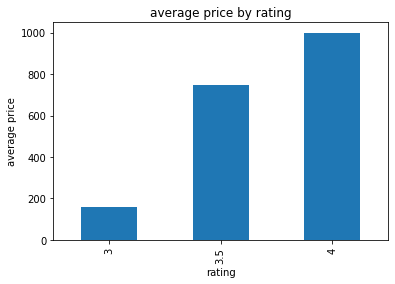

18
summary not found! Leica X-U
                                    Typ 113 https://www.cnet.com/reviews/leica-x-u-typ-113-preview/
summary not found! GoPro Digital HERO 3 Sports Wrist Camera https://www.cnet.com/reviews/gopro-digital-hero-3-sports-wrist-camera-review/
36
summary not found! GoPro Digital HERO 3 Sports Wrist Camera https://www.cnet.com/reviews/gopro-digital-hero-3-sports-wrist-camera-review/
summary not found! Fujifilm FinePix Real 3D W3 https://www.cnet.com/reviews/fujifilm-finepix-real-3d-w3-review/
summary not found! Kodak EasyShare ZD710 https://www.cnet.com/reviews/kodak-easyshare-zd710-review/
summary not found! Sony Alpha A58
                                    with 18-55mm lens https://www.cnet.com/reviews/sony-alpha-a58-with-18-55mm-lens-preview/
summary not found! Pentax Optio A40 https://www.cnet.com/reviews/pentax-optio-a40-review/
54


,name,desc,rating,price,Design,Features,Performance,Image quality
0,Canon EOS Rebel T6,The Canon EOS Rebel T6 (aka the EOS 1300D) hit...,3 out of 5 stars,$449.00,7,6,7,7
1,Canon EOS Rebel Rebel T3i,"For the money, the Canon EOS Rebel T3i is a gr...",3.5 out of 5 stars,$699.99,7,8,8,8
2,Canon EOS Rebel T7i,For a step up in photo quality or performance ...,3.5 out of 5 stars,$799.00,8,8,8,7
3,Canon EOS Rebel T5,While it's a perfectly fine camera when you're...,3 out of 5 stars,$314.99,7,6,7,7
4,Nikon D3300,Very good photo quality for its class plus dec...,3.5 out of 5 stars,$749.00,7,7,8,8
